Do some Clustering of phenotypic data
- get pheno stuff as a matrix
- take the distance/1-correlation matrix of that
- cluster with scipy cluster
- happiness

In [2]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from scipy import cluster as scl
from matplotlib import pyplot as plt
from matplotlib import gridspec as gs

In [4]:
# Load pheno file
#path_root = '/media/yassinebha/database29/Drive/HCP/'
path_root = '/home/yassinebha/Drive/HCP/'
pheno = pd.read_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/hcp_all_pheno_clean.csv'))
use_columns = pheno.drop(["Subject",
                          "Zygosity",
                          'Age_in_Yrs',
                          'Gender',
                          'Race',
                          'Ethnicity',
                          'SSAGA_Income',
                          'SSAGA_Educ',
                          'Noise_Comp', 
                          'GaitSpeed_Comp', 
                          'Mars_Final',
                          'Endurance_Unadj'                        
                         ], axis=1).columns.get_values() # here all pheno
# Number of subtypes
n_sbt = 5
sbt_pheno = pheno[use_columns]
# Find guys who are missing any of these columns
missing = np.array([sbt_pheno[col].isnull().values for col in use_columns]).any(0)
# Don't use these guys
use_pheno = sbt_pheno[~missing]
#save_pheno = use_pheno
use_pheno.to_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/hcp_all_pheno_clean_nonan.csv'), index=False)

In [5]:
use_pheno.head()

,Handedness,BMI,BPSystolic,BPDiastolic,PSQI_Score,PicSeq_Unadj,CardSort_Unadj,Flanker_Unadj,PMAT24_A_CR,PMAT24_A_RTCR,...,Odor_Unadj,PainInterf_Tscore,Taste_Unadj,Dexterity_Unadj,Strength_Unadj,NEOFAC_A,NEOFAC_O,NEOFAC_C,NEOFAC_N,NEOFAC_E
0,95,25.49,135.0,77.0,8,118.70,103.17,121.97,19.0,15590.0,...,101.12,45.9,107.17,96.14,123.48,25.0,15.0,28.0,24.0,25.0
1,65,26.64,119.0,71.0,6,125.07,119.14,130.42,20.0,18574.5,...,108.79,49.7,72.63,106.61,132.46,31.0,23.0,26.0,21.0,32.0
2,95,22.96,117.0,70.0,3,110.61,123.75,112.56,17.0,11839.0,...,101.12,38.6,71.69,118.68,108.34,33.0,24.0,35.0,15.0,37.0
3,55,27.75,152.0,94.0,5,125.71,111.14,121.18,7.0,3042.0,...,108.79,52.6,114.01,117.48,125.18,35.0,29.0,34.0,15.0,33.0
4,85,36.91,141.0,75.0,5,109.04,129.84,126.53,23.0,12280.0,...,122.25,38.6,84.84,121.55,123.16,29.0,33.0,36.0,7.0,15.0


In [6]:
# Show list of columns
list(use_pheno.columns)

['Handedness',
 'BMI',
 'BPSystolic',
 'BPDiastolic',
 'PSQI_Score',
 'PicSeq_Unadj',
 'CardSort_Unadj',
 'Flanker_Unadj',
 'PMAT24_A_CR',
 'PMAT24_A_RTCR',
 'ReadEng_Unadj',
 'PicVocab_Unadj',
 'ProcSpeed_Unadj',
 'DDisc_AUC_200',
 'DDisc_AUC_40K',
 'VSPLOT_TC',
 'VSPLOT_CRTE',
 'SCPT_TPRT',
 'SCPT_SEN',
 'SCPT_SPEC',
 'IWRD_TOT',
 'IWRD_RTC',
 'ER40_CR',
 'ER40_CRT',
 'Sadness_Unadj',
 'FearSomat_Unadj',
 'FearAffect_Unadj',
 'AngAggr_Unadj',
 'AngHostil_Unadj',
 'AngAffect_Unadj',
 'LifeSatisf_Unadj',
 'MeanPurp_Unadj',
 'PosAffect_Unadj',
 'Friendship_Unadj',
 'Loneliness_Unadj',
 'PercHostil_Unadj',
 'PercReject_Unadj',
 'EmotSupp_Unadj',
 'InstruSupp_Unadj',
 'PercStress_Unadj',
 'SelfEff_Unadj',
 'Odor_Unadj',
 'PainInterf_Tscore',
 'Taste_Unadj',
 'Dexterity_Unadj',
 'Strength_Unadj',
 'NEOFAC_A',
 'NEOFAC_O',
 'NEOFAC_C',
 'NEOFAC_N',
 'NEOFAC_E']

In [7]:
# Make matrix out of the remaining guys except subject ID column
pheno_mat = use_pheno.as_matrix()
# Normalize these guys by column
pheno_norm = (pheno_mat - np.mean(pheno_mat, 0))/np.std(pheno_mat, 0)

In [8]:
# Save normalized pheno to be used in octave for bootsrap analysis
ind = use_pheno.index
pheno_norm_df = pd.DataFrame(pheno_norm, columns=use_pheno.columns.get_values(),index=ind)
# merge back ID
merged_pheno_norm = pd.merge(pheno[["Subject"]], pheno_norm_df, how='right', left_index=True, right_index=True)
merged_pheno_norm.rename(columns = {'Subject':''}).to_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/hcp_all_pheno_clean_nonan_norm.csv'), index=False)

In [9]:
merged_pheno_norm

,Subject,Handedness,BMI,BPSystolic,BPDiastolic,PSQI_Score,PicSeq_Unadj,CardSort_Unadj,Flanker_Unadj,PMAT24_A_CR,...,Odor_Unadj,PainInterf_Tscore,Taste_Unadj,Dexterity_Unadj,Strength_Unadj,NEOFAC_A,NEOFAC_O,NEOFAC_C,NEOFAC_N,NEOFAC_E
0,100004,0.654335,-0.263166,0.707393,-0.037319,0.913207,0.542994,-1.134308,0.965002,0.525521,...,-1.105046,0.026416,0.842982,-1.502506,0.604629,-1.370003,-2.125810,-1.117381,1.050313,-0.949911
1,100206,-0.009246,-0.057484,-0.392031,-0.584208,0.250155,1.010927,0.416258,1.811424,0.730758,...,-0.249909,0.524574,-1.532779,-0.541282,1.398086,-0.177269,-0.826617,-1.457295,0.631057,0.217327
2,100307,0.654335,-0.715667,-0.529459,-0.675356,-0.744424,-0.051287,0.863854,0.022419,0.115047,...,-1.105046,-0.930574,-1.597435,0.566834,-0.733113,0.220308,-0.664218,0.072318,-0.207456,1.051068
3,100408,-0.230440,0.141043,1.875531,1.512200,-0.081371,1.057941,-0.360481,0.885869,-1.937323,...,-0.249909,0.904748,1.313457,0.456665,0.754838,0.617886,0.147778,-0.097639,-0.207456,0.384075
4,100610,0.433141,1.779345,1.119677,-0.219615,-0.081371,-0.166618,1.455147,1.421769,1.346469,...,1.250763,-0.930574,-0.692940,0.830321,0.576355,-0.574847,0.797375,0.242275,-1.325474,-2.617393
5,101006,0.543738,0.591755,0.363823,0.874163,-0.744424,-1.956074,-0.938181,-1.050382,-1.116375,...,1.250763,-0.930574,1.986841,-0.548627,-0.050988,-1.171214,-0.826617,0.752146,-0.486961,-0.282918
6,101107,-1.336408,-1.042969,-0.323317,-1.404541,0.581681,-0.419316,0.476455,-0.530509,-0.500664,...,-0.249909,0.577012,2.733136,-1.314301,0.533059,-1.171214,1.122173,0.412232,-0.626713,-0.449666
7,101309,-0.451633,-0.851596,-1.422741,-0.493060,-0.412898,-0.618389,-1.465393,0.133606,-0.295427,...,1.250763,-0.930574,0.789331,-0.285139,0.813155,0.021519,-0.989016,0.242275,-2.024234,-0.783163
8,101410,0.211948,-0.481368,0.226395,1.238755,0.913207,0.232998,0.197800,-0.388270,0.525521,...,1.250763,0.577012,-1.448176,-1.201378,1.614563,-0.376058,-0.339419,0.072318,-0.626713,-0.282918
9,101612,0.101351,2.460779,-1.147885,-1.677986,-0.081371,-0.279010,-0.698363,0.288867,0.525521,...,1.250763,0.393480,0.161343,1.344443,0.267985,-0.574847,-1.801012,0.412232,0.631057,0.050579


In [10]:
# Get the correlation of these
pheno_corr = np.corrcoef(pheno_norm.T)
# And get the distance matrix of that
pheno_dist = scl.hierarchy.distance.pdist(pheno_norm.T)
pheno_dist_mat = scl.hierarchy.distance.squareform(pheno_dist)

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl
def reverse_colourmap(cmap, name = 'my_cmap_r'):
    """
    In: 
    cmap, name 
    Out:
    my_cmap_r

    Explanation:
    t[0] goes from 0 to 1
    row i:   x  y0  y1 -> t[0] t[1] t[2]
                   /
                  /
    row i+1: x  y0  y1 -> t[n] t[1] t[2]

    so the inverse should do the same:
    row i+1: x  y1  y0 -> 1-t[0] t[2] t[1]
                   /
                  /
    row i:   x  y1  y0 -> 1-t[n] t[2] t[1]
    """        
    reverse = []
    k = []   

    for key in cmap._segmentdata:    
        k.append(key)
        channel = cmap._segmentdata[key]
        data = []

        for t in channel:                    
            data.append((1-t[0],t[2],t[1]))            
        reverse.append(sorted(data))    

    LinearL = dict(zip(k,reverse))
    my_cmap_r = mpl.colors.LinearSegmentedColormap(name, LinearL) 
    return my_cmap_r

In [12]:
cmap = mpl.cm.jet
cmap_r = reverse_colourmap(cmap)

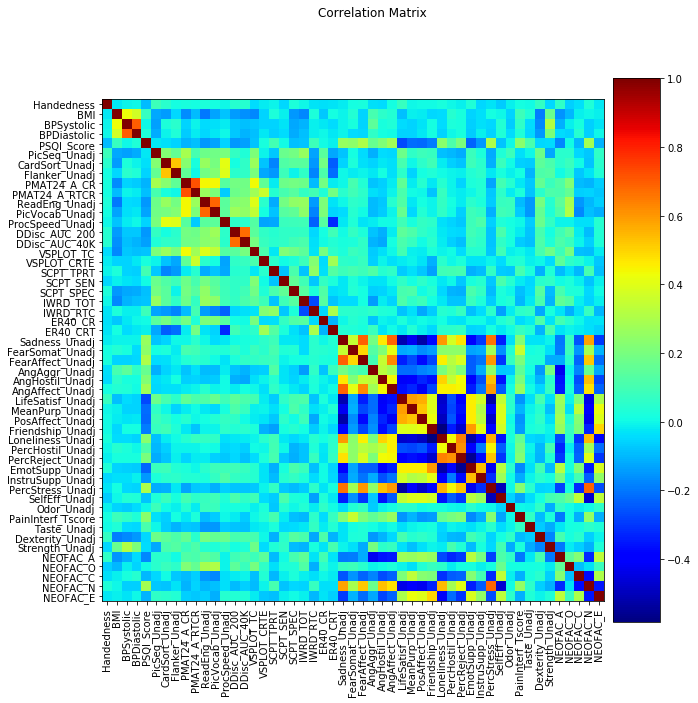

In [13]:
# Show that correlation
gsp = gs.GridSpec(1, 10)
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(gsp[0,:9])
axcl = f.add_subplot(gsp[0,9])
p = ax.imshow(pheno_corr,cmap = mpl.cm.jet)
tmp = ax.set_yticks(range(len(use_columns)))
tmp = ax.set_yticklabels(use_columns)
tmp = ax.set_xticks(range(len(use_columns)))
tmp = ax.set_xticklabels(use_columns, rotation=90)
tmp = f.colorbar(p, cax=axcl)
tmp = f.suptitle('Correlation Matrix')

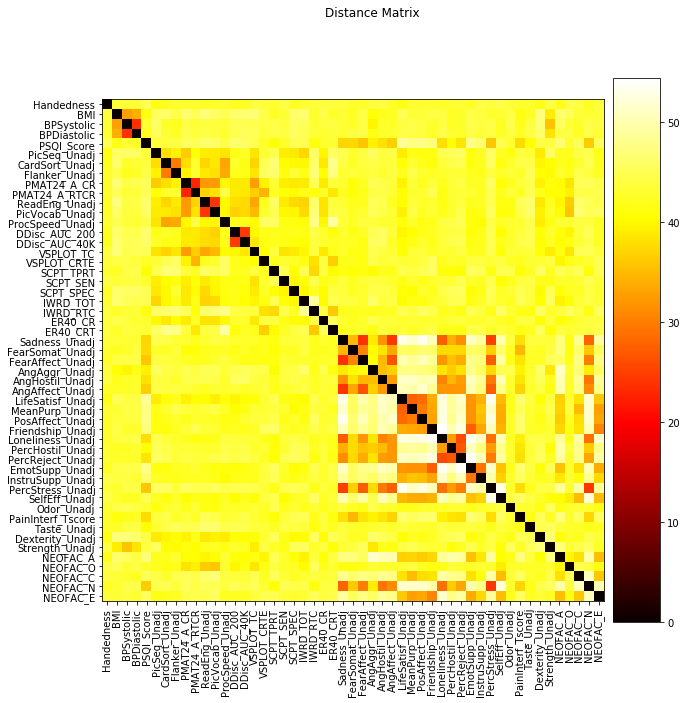

In [14]:
# Show that distance
gsp = gs.GridSpec(1, 10)
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(gsp[0,:9])
axcl = f.add_subplot(gsp[0,9])
p = ax.imshow(pheno_dist_mat,cmap = mpl.cm.hot)
tmp = ax.set_yticks(range(len(use_columns)))
tmp = ax.set_yticklabels(use_columns)
tmp = ax.set_xticks(range(len(use_columns)))
tmp = ax.set_xticklabels(use_columns, rotation=90)
tmp = f.colorbar(p, cax=axcl)
tmp = f.suptitle('Distance Matrix')

In [15]:
# Now do some clustering on that
link = scl.hierarchy.linkage(pheno_dist, method='ward')
part = scl.hierarchy.fcluster(link, n_sbt, criterion='maxclust')
order = scl.hierarchy.dendrogram(link, no_plot=True)['leaves']

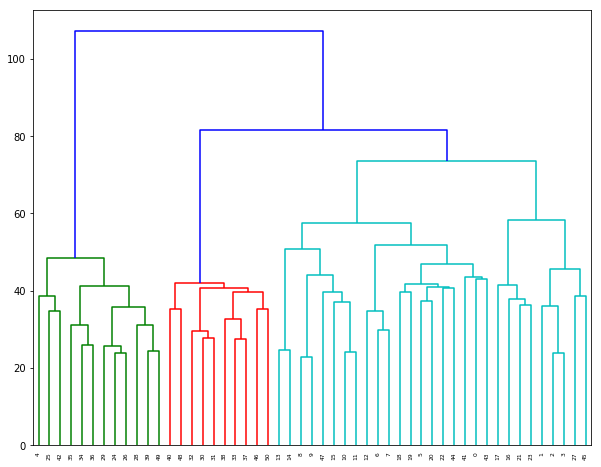

In [16]:
plt.figure(figsize=(10, 8))
dn = scl.hierarchy.dendrogram(link)

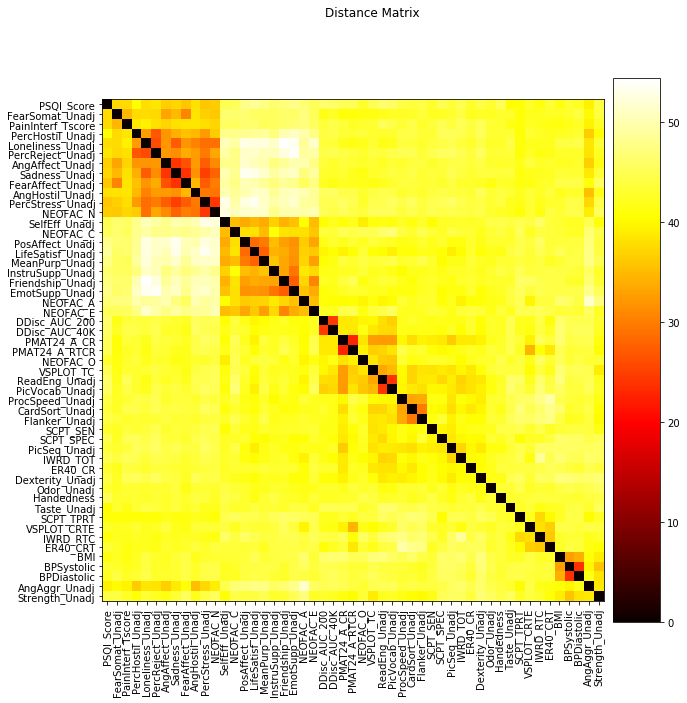

In [17]:
# Plot the distance matrix again, but now ordered by hierarchy
label_ord = [use_columns[ord] for ord in order]
gsp = gs.GridSpec(1, 10)
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(gsp[0,:9])
axcl = f.add_subplot(gsp[0,9])
p = ax.imshow(pheno_dist_mat[order, :][:, order],cmap =mpl.cm.hot)
tmp = ax.set_yticks(range(len(use_columns)))
tmp = ax.set_yticklabels(label_ord)
tmp = ax.set_xticks(range(len(use_columns)))
tmp = ax.set_xticklabels(label_ord, rotation=90)
tmp = f.colorbar(p, cax=axcl)
tmp = f.suptitle('Distance Matrix')

In [18]:
# Here are the groups I found:
for sid in np.unique(part):
    match_cols = [use_columns[x] for x in np.where(part==sid)[0]]
    print('Subtype {} has the following variables:'.format(sid))
    for col in match_cols:
        print('    {}'.format(col))

Subtype 1 has the following variables:
    PSQI_Score
    Sadness_Unadj
    FearSomat_Unadj
    FearAffect_Unadj
    AngHostil_Unadj
    AngAffect_Unadj
    Loneliness_Unadj
    PercHostil_Unadj
    PercReject_Unadj
    PercStress_Unadj
    PainInterf_Tscore
    NEOFAC_N
Subtype 2 has the following variables:
    LifeSatisf_Unadj
    MeanPurp_Unadj
    PosAffect_Unadj
    Friendship_Unadj
    EmotSupp_Unadj
    InstruSupp_Unadj
    SelfEff_Unadj
    NEOFAC_A
    NEOFAC_C
    NEOFAC_E
Subtype 3 has the following variables:
    Handedness
    PicSeq_Unadj
    CardSort_Unadj
    Flanker_Unadj
    PMAT24_A_CR
    PMAT24_A_RTCR
    ReadEng_Unadj
    PicVocab_Unadj
    ProcSpeed_Unadj
    DDisc_AUC_200
    DDisc_AUC_40K
    VSPLOT_TC
    SCPT_SEN
    SCPT_SPEC
    IWRD_TOT
    ER40_CR
    Odor_Unadj
    Taste_Unadj
    Dexterity_Unadj
    NEOFAC_O
Subtype 4 has the following variables:
    VSPLOT_CRTE
    SCPT_TPRT
    IWRD_RTC
    ER40_CRT
Subtype 5 has the following variables:
    BMI
    

### niak clustering result:
```
Cluster 1:
     Sadness_Unadj
     AngHostil_Unadj
     PercHostil_Unadj
     FearAffect_Unadj
     PercReject_Unadj
     AngAffect_Unadj
     Loneliness_Unadj
     PercStress_Unadj
     NEOFAC_N
Cluster 2:
     LifeSatisf_Unadj
     Friendship_Unadj
     InstruSupp_Unadj
     MeanPurp_Unadj
     EmotSupp_Unadj
     NEOFAC_E
     PosAffect_Unadj
     SelfEff_Unadj
     NEOFAC_C
     NEOFAC_A
Cluster 3:
     PicSeq_Unadj
     IWRD_TOT
     PMAT24_A_CR
     PMAT24_A_RTCR
     ReadEng_Unadj
     PicVocab_Unadj
     VSPLOT_TC
     CardSort_Unadj
     ProcSpeed_Unadj
     Flanker_Unadj
     Endurance_Unadj
     ER40_CR
     Dexterity_Unadj
     DDisc_AUC_200
     DDisc_AUC_40K
     NEOFAC_O
     SCPT_SEN
     SCPT_SPEC
     GaitSpeed_Comp
     Odor_Unadj
     Mars_Final
Cluster 4:
     BMI
     BPSystolic
     BPDiastolic
     SCPT_TPRT
     IWRD_RTC
     ER40_CRT
     VSPLOT_CRTE
     Noise_Comp
     Taste_Unadj
     Strength_Unadj
     PSQI_Score
     PainInterf_Tscore
     FearSomat_Unadj
     AngAggr_Unadj```

In [19]:
# Make a new pheno table with the average scores of these subtypes
data = np.array([np.mean(use_pheno[[use_columns[x] for x in np.where(part==sid)[0]]],1) for sid in np.unique(part)])
ind = use_pheno.index
col_names = ['Subtype_{}'.format(x) for x in np.unique(part)]
sbt_pheno = pd.DataFrame(data=data.T, columns=col_names, index=ind)
# Merge this with the original dataframe so I can get all that other stuff I didn't use
merged_pheno = pd.merge(pheno, sbt_pheno, how='right', left_index=True, right_index=True)

In [20]:
# Look at it (new stuff on the right)
merged_pheno.head()

,Subject,Age_in_Yrs,Gender,Handedness,Zygosity,Race,Ethnicity,SSAGA_Income,SSAGA_Educ,BMI,...,NEOFAC_A,NEOFAC_O,NEOFAC_C,NEOFAC_N,NEOFAC_E,Subtype_1,Subtype_2,Subtype_3,Subtype_4,Subtype_5
0,100004,24,1,95,0.0,0,0,4.0,14.0,25.49,...,25.0,15.0,28.0,24.0,25.0,55.466667,81.798,514.687867,32.87,963.273871
1,100206,27,1,65,0.0,0,0,4.0,16.0,26.64,...,31.0,23.0,26.0,21.0,32.0,56.222222,77.894,563.743978,41.26,1146.496604
2,100307,27,2,95,1.0,0,0,7.0,16.0,22.96,...,33.0,24.0,35.0,15.0,37.0,49.822222,67.590,489.590000,43.84,746.693837
3,100408,33,1,55,2.0,0,0,7.0,16.0,27.75,...,35.0,29.0,34.0,15.0,33.0,46.044444,91.578,519.996189,47.05,233.552224
4,100610,27,1,85,1.0,0,0,6.0,16.0,36.91,...,29.0,33.0,36.0,7.0,15.0,42.366667,83.042,466.417244,44.53,779.333816


In [21]:
# Save the new thing so I can look at it later
merged_pheno.to_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/clustered_hcp_all_pheno_clean.csv'), index=False)

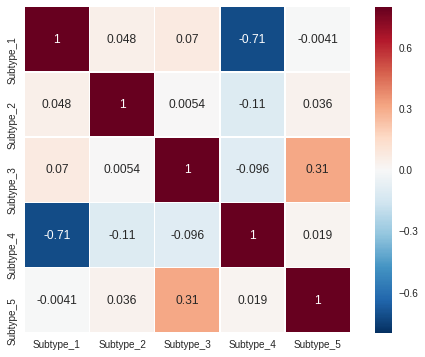

In [22]:
import seaborn as sns
f, ax = plt.subplots(figsize=(n_sbt+4, n_sbt+1))
sns.heatmap(merged_pheno.get(["Subtype_{}".format(x) for x in np.arange(1,n_sbt+1)]).corr(),linewidths=.5,annot=True,ax=ax,vmax=.8,square=True)